In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import seaborn as sns
import plotly.express as px
import scipy


In [2]:
df = pd.read_csv("data_model_pwtr.csv")

In [46]:
def pearson_cor_group(group):
    return scipy.stats.pearsonr(group['Ncasos_lead'], group['sars_loess'])[0], scipy.stats.spearmanr(group['Ncasos_lead'], group['sars_loess'])[0], scipy.stats.kendalltau(group['Ncasos_lead'], group['sars_loess'])[0]

df_corr = df.groupby(by='Mun').apply(pearson_cor_group)
df_corr = pd.DataFrame(df_corr)
df_corr.reset_index(inplace=True)
df_corr['Pearson'] = df_corr[0].apply(lambda x: x[0])   
df_corr['Spearman'] = df_corr[0].apply(lambda x: x[1])   
df_corr['Kendall'] = df_corr[0].apply(lambda x: x[2])   
df_corr = df_corr.merge(df[['Mun', 'nHab']].drop_duplicates(subset='Mun', keep='last'), how='inner', on='Mun')
df_corr

,Mun,0,Pearson,Spearman,Kendall,nHab
0,ABRERA,"(0.38012972662595357, 0.4180222945371694, 0.28...",0.380130,0.418022,0.287677,12697
1,AMPOSTA,"(0.6748941448147758, 0.6983887963977661, 0.518...",0.674894,0.698389,0.518464,21807
2,ARGENTONA,"(0.4153014958530864, 0.3219095926603794, 0.230...",0.415301,0.321910,0.230994,12745
3,ARTÉS,"(0.3694038495986967, 0.43715247603952634, 0.30...",0.369404,0.437152,0.303035,5902
4,BADALONA,"(0.43730191705382687, 0.29311450102634246, 0.2...",0.437302,0.293115,0.201931,223506
...,...,...,...,...,...,...
67,VILAFRANCA DEL PENEDÈS,"(0.5550473455576282, 0.6451314191829337, 0.477...",0.555047,0.645131,0.477887,40056
68,VILANOVA DEL CAMÍ,"(0.36651357749747127, 0.3343614623812721, 0.23...",0.366514,0.334361,0.232180,12699
69,VILANOVA I LA GELTRÚ,"(0.5926276085587177, 0.652454984409296, 0.4763...",0.592628,0.652455,0.476314,68152
70,VILASSAR DE DALT,"(0.3809666699593821, 0.3594287977101453, 0.261...",0.380967,0.359429,0.261145,9128


In [11]:
np.corrcoef(df['Ncasos_lead'], df['sars_loess'])[0,1]

0.3511540914762785

In [9]:
fig = px.scatter_3d(df, x='Ncasos_lead', y='sars_loess', z='nHab',
              color='Mun', 
              range_x = [df['Ncasos_lead'].min(), df['Ncasos_lead'].max()],
              range_y = [df['sars_loess'].min(), df['sars_loess'].max()],
              range_z = [df['nHab'].min(), df['nHab'].max()],
              width=1000, height=1000)
fig.show()

In [36]:
def custom_ranges(n):
    i1 = 25000
    i2 = 100000
    if n <= i1:
        return "Small"
    elif n > i1 and n <= i2:
        return "Medium"
    else:
        return "Large"

df['nHab_disc'] = df['nHab'].apply(lambda x: custom_ranges(x))

df[['Mun', 'nHab_disc']].groupby('nHab_disc').nunique()



,Mun,nHab
nHab_disc,,
Large,10,30
Medium,24,72
Small,38,114


<AxesSubplot: xlabel='nHab_disc', ylabel='count'>

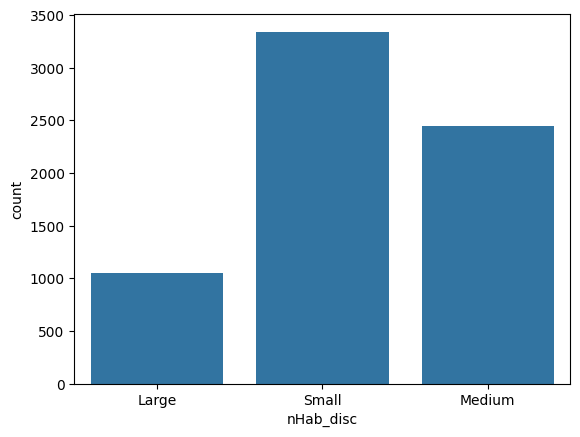

In [35]:
sns.countplot(df, x = "nHab_disc")

In [37]:
df.columns

Index(['Week', 'Mun', 'Ncasos', 'Year', 'Ncasos_lead', 'Ncasos_lag',
       'Ncasos_lagroll_15', 'Ncasos_lagroll_30', 'EDAR', 'nHab', 'N1', 'N2',
       'IP4', 'E', 'caudal', 'lluvia', 'Fecha', 'sars2', 'sars', 'n1_fill',
       'f_num', 'n1_loess', 'n1_loess_15', 'n1_loess_30', 'sars_loess',
       'sars_loess_15', 'sars_loess_30', 'sars2_loess', 'sars2_loess_15',
       'sars2_loess_30', 'Month', 'nHab_disc'],
      dtype='object')

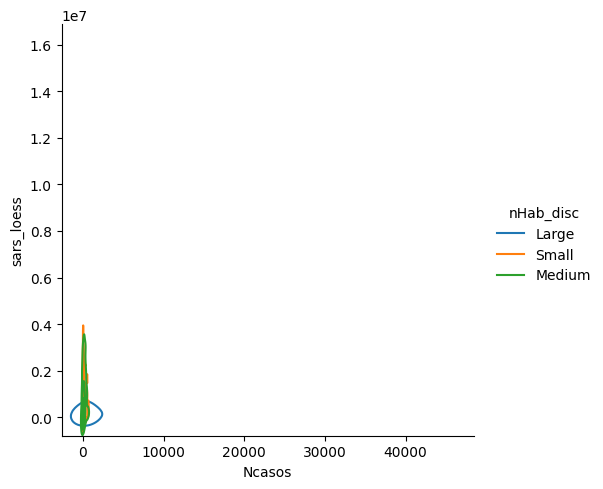

In [40]:
sns.displot(df, x = "Ncasos", y = "sars_loess", hue = "nHab_disc", kind = "kde")

In [44]:
from math import log
df['nCasos_log'] = df['Ncasos'].apply(lambda x: log(x+1))
df['sars_log'] = df['sars_loess'].apply(lambda x: log(x+1))

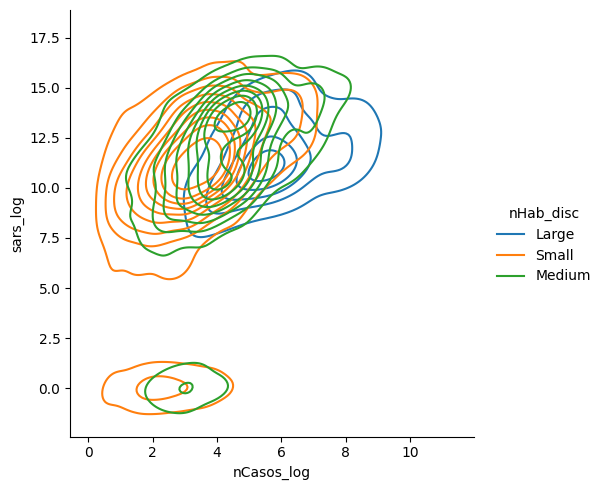

In [50]:
sns.displot(df, x = "nCasos_log", y = "sars_log", hue = "nHab_disc", kind = "kde", levels = 10)

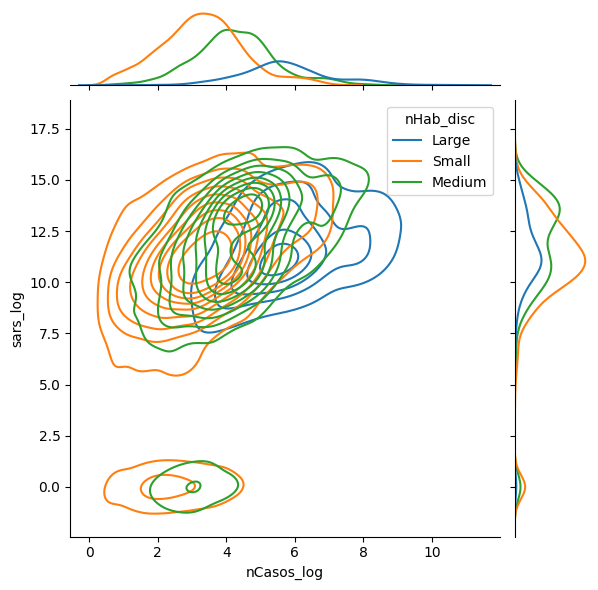

In [69]:
sns.jointplot(
    data = df,
    x = "nCasos_log",
    y = "sars_log",
    hue = "nHab_disc", 
    kind = "kde"
    
)

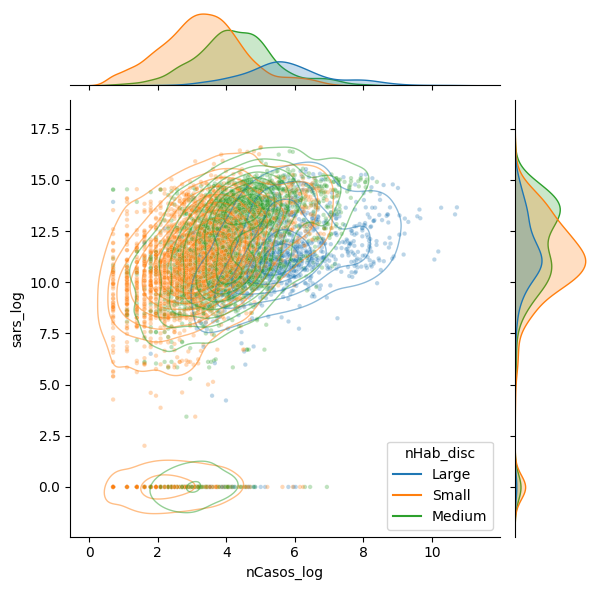

In [120]:
sns.set_palette("tab10")
g = sns.jointplot(
    data = df,
    x = "nCasos_log",
    y = "sars_log",
    hue = "nHab_disc",
    joint_kws={"s":10},
    alpha = .3
    
)
g.plot_joint(sns.kdeplot, linewidths = 1, alpha = .5)
plt.savefig("test.svg")


In [94]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]